# Personal Protection Equipment Detection model
This notebook shows how you can use Python API to perform inference on endpoint created from the model

### 1. Start the trial or buy our VitechLab PPE model on AWS Marketplace

You can find our model here: https://aws.amazon.com/marketplace/pp/prodview-6gvzwuebead3o

### 2. Create a new endpoint using AWS SageMaker Python API or SageMaker console
You can find our example here: https://github.com/VITechLab/PPE-Detector/blob/master/Using-Personal-Protection-Equipment-Detection-model.ipynb

### 3. Generating Prediction using `RealTimePredictor`

In [44]:
import sagemaker as sage

sess = sage.Session()
endpoint_name = '<YOUR ENDPOINT NAME HERE>'

predictor = sage.predictor.RealTimePredictor(
    endpoint_name,
    sagemaker_session=sess, 
    content_type="image/jpeg"
)

In [16]:
file_name = 'sample_data/demo_input/image2.jpg'

with open(file_name, 'rb') as image:
    f = image.read()
    image_bytes = bytearray(f)

prediction_result = predictor.predict(image_bytes).decode("utf-8")

In [19]:
import json

result = json.loads(prediction_result)
result

[{'name': 'person',
  'percentage_probability': 79.2194128036499,
  'box_points': [1280, 876, 2043, 2633],
  'classes': {'no_coat': 100.0,
   'no_glasses': 99.99352693557739,
   'no_glove': 99.9998688697815,
   'no_mask': 99.99996423721313}},
 {'name': 'person',
  'percentage_probability': 91.37822389602661,
  'box_points': [1979, 622, 3918, 2862],
  'classes': {'no_coat': 0.00046719887905055657,
   'no_glasses': 0.06757694063708186,
   'no_glove': 5.823622473144496e-05,
   'no_mask': 99.99995231628418}},
 {'name': 'person',
  'percentage_probability': 96.49577736854553,
  'box_points': [13, 482, 1925, 2822],
  'classes': {'no_coat': 60.763031244277954,
   'no_glasses': 99.77238774299622,
   'no_glove': 99.58042502403259,
   'no_mask': 99.99998807907104}}]

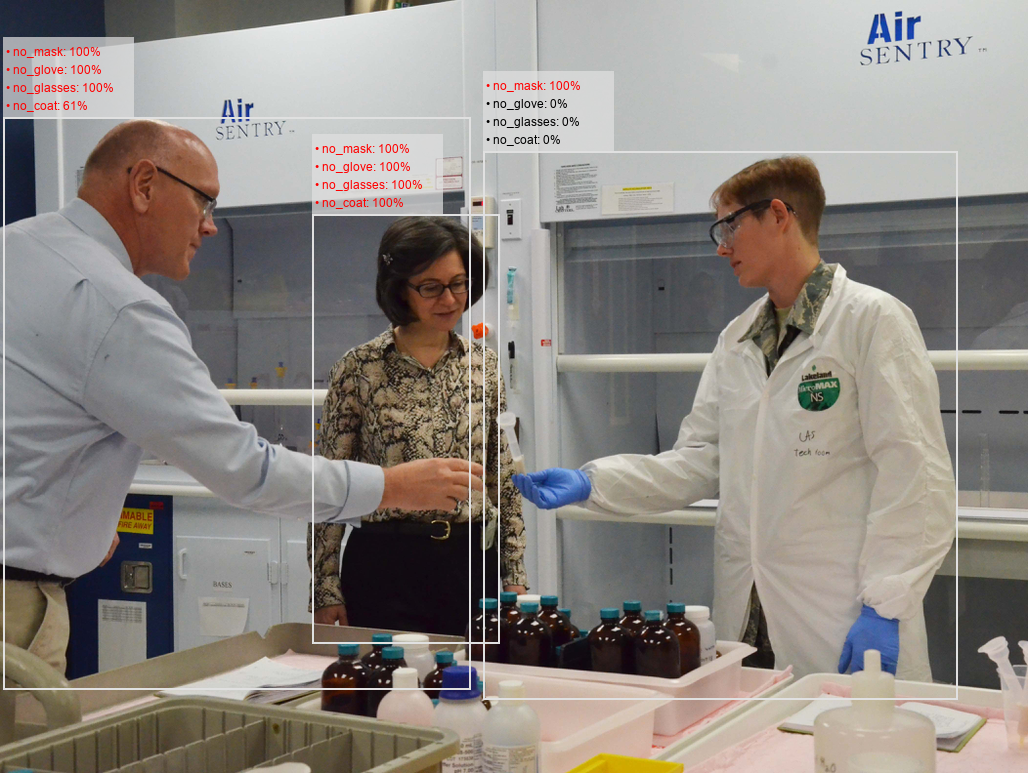

In [20]:
from utils import visualize_detection

visualize_detection(file_name, result)

_Photo by Susan A. Romano_

### Delete the Endpoint
Having an endpoint running will incur some costs. Therefore as a clean-up job, we should delete the endpoint.

In [21]:
sess.delete_endpoint(predictor.endpoint)